In [1]:
#Importing libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import files
uploaded = files.upload()

Saving final_data_17406.xlsx to final_data_17406 (2).xlsx


In [3]:
import io
df = pd.read_excel(io.BytesIO(uploaded['final_data_17406.xlsx']))
df.head()

,authors,category,content,date,id,img_src,section,title,topics,url,startups,mobile,apps,social,gadgets,europe,enterprise
0,Lora Kolodny,Government,Investigative reporter and co-founder of Democ...,2016-10-15,1402133,https://tctechcrunch2011.files.wordpress.com/2...,enterprise/,Multi-media journalists face jail time after r...,edward-snowden,https://techcrunch.com/2016/10/15/multi-media-...,0,0,0,1,0,0,0
1,Keith Teare,Social,\n\nThe problems associated with the widesprea...,2016-10-07,1398512,https://tctechcrunch2011.files.wordpress.com/2...,social/,The case for Twitter’s independence (unless Go...,twitter,https://techcrunch.com/2016/10/07/you-cannot-t...,0,0,0,1,0,0,0
2,Frederic Lardinois,Cloud,"OpenStack, the massive open source project tha...",2016-10-06,1398065,https://tctechcrunch2011.files.wordpress.com/2...,enterprise/,OpenStack’s latest release focuses on scalabil...,NaN,https://techcrunch.com/2016/10/06/openstacks-l...,0,0,0,0,0,0,1
3,Haje Jan Kamps,Europe,It’s been just over a year since Adobe launche...,2016-10-05,1396326,https://tctechcrunch2011.files.wordpress.com/2...,europe/,Adobe teams up with EyeEm to expand its stock ...,NaN,https://techcrunch.com/2016/10/05/adobe-eyeem-...,1,1,0,0,0,1,0
4,Dr. Nancy Markley,Startups,\n\nMany startup companies begin with either a...,2016-10-04,1396165,https://tctechcrunch2011.files.wordpress.com/2...,startups/,Due diligence is a responsibility for investor...,NaN,https://techcrunch.com/2016/10/04/due-diligenc...,1,0,0,0,0,0,0


In [4]:
#df.drop(['id','date','img_src','section','topics','url'],axis=1,inplace=True)
df_main = df[['content','title','startups','mobile','apps','social','gadgets','europe','enterprise']]
df_main.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
df_main['content'] = df_main['content'].str.lstrip()
df_main['title'] = df_main['title'].str.lstrip()
#df_main['tags'] = df_main['tags'].str.lstrip()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
def checking_Data(index):
    row = df_main[df_main.index == index][['title', 'content']].values[0]
    if len(row) > 0:
        print('Title:',row[0])
        print('Content:',row[1])        
checking_Data(0)

Title: Multi-media journalists face jail time after reporting on North Dakota pipeline protest
Content: Investigative reporter and co-founder of Democracy Now!, Amy Goodman, is now facing riot charges in the state of North Dakota after her report on a Native American-led pipeline protest there went viral on Facebook.
Democracy Now! issued a statement about the new charges against Goodman late Saturday.
The news organization, which spun out of WBAI-FM, creates programming which is syndicated via radio, podcasts, cable television, public access television, live streams and Web downloads.
Goodman’s story, posted to Facebook on September 4th, has been viewed more than 14 million times on the social media platform, Democracy Now! said, and was picked up by mainstream media outlets and networks including CBS, NBC, NPR, CNN, MSNBC and The Huffington Post (a site owned by TechCrunch’s parent company Verizon).
Additionally, documentary filmmaker Deia Schlosberg, is facing felony and conspiracy 

In [7]:
#Cleansing Content and Tags:
replace_blank_regex = re.compile('[/(){}\[\]\|@,;]')
symbols_removel_regex = re.compile('[^0-9a-z #+_$%-.,]')
stopword_det = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = replace_blank_regex.sub(' ', text) # replace replace_blank_regex symbols by space in text
    text = symbols_removel_regex.sub('', text) # delete symbols which are in symbols_removel_regex from text
    text = ' '.join(word for word in text.split() if word not in stopword_det) # delete stopwors from text
    return text
    
df_main['content'] = df_main['content'].apply(clean_text)
df_main['title'] = df_main['title'].apply(clean_text)
checking_Data(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Title: multi-media journalists face jail time reporting north dakota pipeline protest
Content: investigative reporter co-founder democracy amy goodman nowfacing riot charges state north dakota report native american-led pipeline protest went viral facebook.democracy issued statement new charges goodman late saturday.the news organization spun wbai-fm creates programming syndicated via radio podcasts cable television public access television live streams web downloads.goodmans story posted facebook september 4th viewed 14 million times social media platform democracy said picked mainstream media outlets networks including cbs nbc npr cnn msnbc huffington post site owned techcrunchs parent company verizon .additionally documentary filmmaker deia schlosberg facing felony conspiracy charges could carry 45-year sentence filming protest indiewire reports.edward snowden noted schlosbergs predicament friday tweet said reporter prosecuted covering north dakota oil protests. reference face mere 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
#Lemmatizing Content and Title:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    lem_sentence=[]
    lem_sentence= [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

    return " ".join(lem_sentence) 
    
df_main['content_lemmatized'] = df_main.content.apply(lemmatize_text)
df_main['title_lemmatized'] = df_main.title.apply(lemmatize_text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
#Lemmatizing Content and Title just tokens for Word embeddings:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text_tok(text):
    lem_sentence=[]
    lem_sentence= [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

    return (lem_sentence)

df_main['content_lemmatized_Tok'] = df_main.content.apply(lemmatize_text_tok)
df_main['title_lemmatized_Tok'] = df_main.title.apply(lemmatize_text_tok)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
#Combining Content+Title:
df_main['content+title'] = df_main['title_lemmatized']+' '+df_main['content_lemmatized']
df_main['content+title'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    multi-media journalist face jail time reportin...
1    case twitter independence unless google manage...
2    openstacks latest release focus scalability re...
3    adobe team eyeem expand stock photography port...
4    due diligence responsibility investor opportun...
Name: content+title, dtype: object

In [11]:
df_main.head()

,content,title,startups,mobile,apps,social,gadgets,europe,enterprise,content_lemmatized,title_lemmatized,content_lemmatized_Tok,title_lemmatized_Tok,content+title
0,investigative reporter co-founder democracy am...,multi-media journalists face jail time reporti...,0,0,0,1,0,0,0,investigative reporter co-founder democracy am...,multi-media journalist face jail time reportin...,"[investigative, reporter, co-founder, democrac...","[multi-media, journalist, face, jail, time, re...",multi-media journalist face jail time reportin...
1,problems associated widespread rumors twitters...,case twitters independence unless google manag...,0,0,0,1,0,0,0,problem associated widespread rumor twitter sa...,case twitter independence unless google manage...,"[problem, associated, widespread, rumor, twitt...","[case, twitter, independence, unless, google, ...",case twitter independence unless google manage...
2,openstack themassive open source project helps...,openstacks latest release focuses scalability ...,0,0,0,0,0,0,1,openstack themassive open source project help ...,openstacks latest release focus scalability re...,"[openstack, themassive, open, source, project,...","[openstacks, latest, release, focus, scalabili...",openstacks latest release focus scalability re...
3,beenjust year since adobe launched adobe stock...,adobe teams eyeem expand stock photography por...,1,1,0,0,0,1,0,beenjust year since adobe launched adobe stock...,adobe team eyeem expand stock photography port...,"[beenjust, year, since, adobe, launched, adobe...","[adobe, team, eyeem, expand, stock, photograph...",adobe team eyeem expand stock photography port...
4,many startup companies begin either idea propr...,due diligence responsibility investors opportu...,1,0,0,0,0,0,0,many startup company begin either idea proprie...,due diligence responsibility investor opportun...,"[many, startup, company, begin, either, idea, ...","[due, diligence, responsibility, investor, opp...",due diligence responsibility investor opportun...


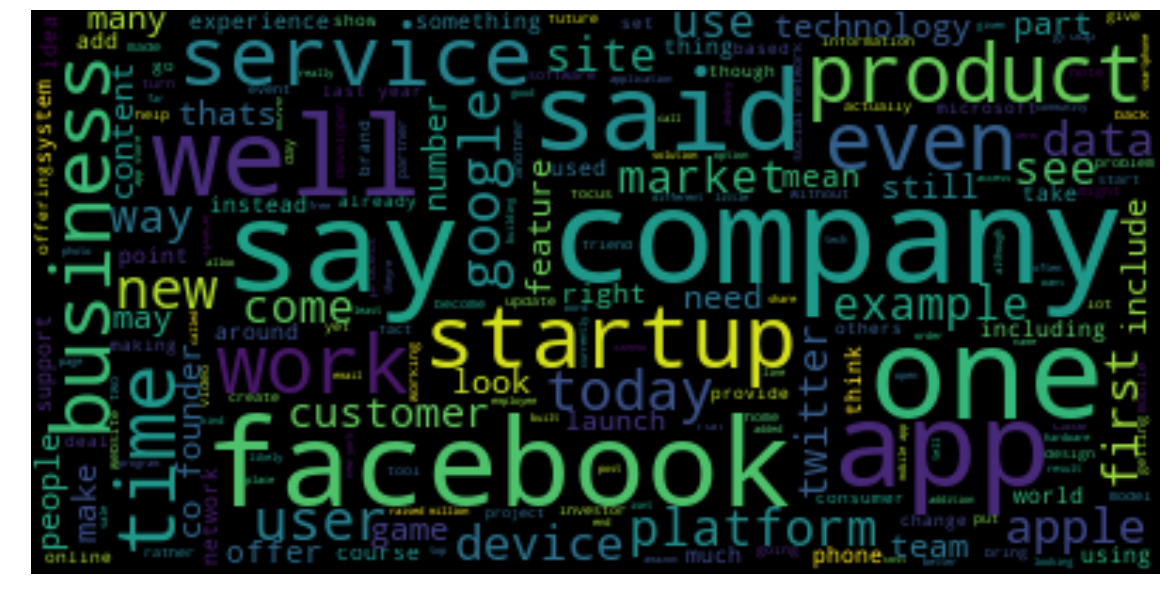

In [0]:
#Word Cloud:
content_words = ' '
for words in df_main['content+title']:
  content_words = content_words + words + ' '
  
  
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
wc=WordCloud(background_color='black',max_font_size=50).generate(content_words)
plt.figure(figsize=(16,12),facecolor=None)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

#Bag of words:

In [0]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(max_features=10000) 
X = vectorizer.fit_transform(df_main['content+title']).toarray()

In [13]:
X.shape

(17386, 10000)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer  
tfidfconverter = TfidfTransformer(sublinear_tf=True)  
X = tfidfconverter.fit_transform(X).toarray()

In [0]:
X_df = pd.DataFrame(X)

In [0]:
#Using SVD: (Not using)
#from sklearn.decomposition import TruncatedSVD
#svd = TruncatedSVD(n_components=10000, n_iter=7, random_state=42)
#X_transformed_SVD = svd.fit_transform(X_df)

#print(svd.explained_variance_ratio_.sum())

In [17]:
#Creating Dataframe:
SVD_df_X = pd.DataFrame(X_df)#X_transformed_SVD)


SVD_df_Y = df_main[['startups','mobile','apps','social','gadgets','europe','enterprise']]
SVD_df_Y.shape

(17386, 7)

In [18]:
pip install scikit-multilearn

In [0]:
# Split dataset into training set and test set (70:30 ratio):
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(SVD_df_X, 
                                SVD_df_Y, test_size=0.2,random_state=42)

# Binary Relevance:

In [0]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB(priors=None, var_smoothing=1e-09))
#classifier = BinaryRelevance(LogisticRegression(C=12, intercept_scaling=1,   
#               dual=False, fit_intercept=True, penalty='l2', tol=0.0001))
# train
classifier.fit(X_train, y_train)
# predict
pred_Bin = classifier.predict(X_test)

#Measuring metrics:
from sklearn.metrics import classification_report,accuracy_score
print("classification_report",classification_report(y_test,pred_Bin))
print("accuracy_score",accuracy_score(y_test,pred_Bin))
#Hamming Loss:
from sklearn.metrics import hamming_loss
print("hamming_loss",hamming_loss(y_test,pred_Bin))

classification_report               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1606
           1       0.50      0.81      0.62      1070
           2       0.35      0.76      0.48       770
           3       0.38      0.86      0.52       758
           4       0.46      0.84      0.59       689
           5       0.32      0.79      0.46       599
           6       0.30      0.70      0.42       430

   micro avg       0.44      0.79      0.57      5922
   macro avg       0.43      0.79      0.55      5922
weighted avg       0.49      0.79      0.59      5922
 samples avg       0.50      0.81      0.57      5922

accuracy_score 0.1503737780333525
hamming_loss 0.29376488950957036


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


# Classifier Chains:

In [20]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(DecisionTreeClassifier())
#classifier = ClassifierChain(LogisticRegression(C=12, intercept_scaling=1,   
#               dual=False, fit_intercept=True, penalty='l2', tol=0.0001))

# train
classifier.fit(X_train, y_train)
# predict
pred_Chains = classifier.predict(X_test)

#Measuring metrics:
from sklearn.metrics import classification_report,accuracy_score
print("classification_report",classification_report(y_test,pred_Chains))
print("accuracy_score",accuracy_score(y_test,pred_Chains))
#Hamming Loss:
from sklearn.metrics import hamming_loss
print("hamming_loss",hamming_loss(y_test,pred_Chains))

classification_report               precision    recall  f1-score   support

           0       0.66      0.66      0.66      1606
           1       0.59      0.61      0.60      1070
           2       0.49      0.52      0.50       770
           3       0.59      0.61      0.60       758
           4       0.63      0.62      0.63       689
           5       0.66      0.64      0.65       599
           6       0.51      0.50      0.51       430

   micro avg       0.60      0.61      0.60      5922
   macro avg       0.59      0.59      0.59      5922
weighted avg       0.60      0.61      0.61      5922
 samples avg       0.59      0.63      0.58      5922

accuracy_score 0.2622196664749856
hamming_loss 0.19305019305019305


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


# Label Powerset:

In [0]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.linear_model import LogisticRegression
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression(C=12, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001))
# train
classifier.fit(X_train, y_train)
# predict
pred_Power = classifier.predict(X_test)

#Measuring metrics:
from sklearn.metrics import classification_report,accuracy_score
print("classification_report",classification_report(y_test,pred_Power))
print("accuracy_score",accuracy_score(y_test,pred_Power))
#Hamming Loss:
from sklearn.metrics import hamming_loss
print("hamming_loss",hamming_loss(y_test,pred_Power))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


classification_report               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1606
           1       0.80      0.62      0.70      1070
           2       0.71      0.49      0.58       770
           3       0.78      0.64      0.70       758
           4       0.84      0.82      0.83       689
           5       0.90      0.66      0.77       599
           6       0.87      0.60      0.71       430

   micro avg       0.80      0.68      0.73      5922
   macro avg       0.81      0.66      0.72      5922
weighted avg       0.80      0.68      0.73      5922
 samples avg       0.82      0.73      0.74      5922

accuracy_score 0.5031627372052904
hamming_loss 0.11895177852624661


# MLkNN:

In [0]:
##MLkNN:
from skmultilearn.adapt import MLkNN
classifier = MLkNN(k=20)
classifier.fit(X_train.as_matrix(),y_train.as_matrix())
# predict
predictions = classifier.predict(X_test)
#print(predictions.toarray())
#print(y_test)
from sklearn.metrics import classification_report,accuracy_score
print("classification_report",classification_report(y_test,predictions))
print("accuracy_score",accuracy_score(y_test,predictions))
#Hamming Loss:
from sklearn.metrics import hamming_loss
print("hamming_loss",hamming_loss(y_test,predictions))

classification_report               precision    recall  f1-score   support

           0       0.75      0.80      0.78      1606
           1       0.74      0.63      0.68      1070
           2       0.60      0.57      0.58       770
           3       0.73      0.72      0.72       758
           4       0.85      0.80      0.82       689
           5       0.74      0.67      0.71       599
           6       0.83      0.61      0.70       430

   micro avg       0.74      0.70      0.72      5922
   macro avg       0.75      0.69      0.71      5922
weighted avg       0.74      0.70      0.72      5922
 samples avg       0.76      0.74      0.72      5922

accuracy_score 0.43962047153536515
hamming_loss 0.13168487636572743


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


# HARAM: A Hierarchical ARAM Neural Network for Large-Scale Text Classification

In [0]:
pip install scikit-multilearn

    100% |████████████████████████████████| 92kB 3.4MB/s 


In [0]:
import skmultilearn
from skmultilearn.adapt import MLARAM

classifier_MLARAM = MLARAM(threshold=0.05, vigilance=0.95)
classifier_MLARAM.fit(X_train.as_matrix(),y_train.as_matrix())
pred_MLARAM = classifier_MLARAM.predict(X_test.as_matrix())

from sklearn.metrics import classification_report,accuracy_score
print("classification_report",classification_report(y_test,pred_MLARAM))
print("accuracy_score",accuracy_score(y_test,pred_MLARAM))
#Hamming Loss:
from sklearn.metrics import hamming_loss
print("hamming_loss",hamming_loss(y_test,pred_MLARAM))

classification_report               precision    recall  f1-score   support

           0       0.56      0.96      0.71      1606
           1       0.57      0.54      0.56      1070
           2       0.46      0.36      0.41       770
           3       0.56      0.46      0.50       758
           4       0.80      0.72      0.76       689
           5       0.83      0.32      0.46       599
           6       0.85      0.31      0.46       430

   micro avg       0.59      0.60      0.60      5922
   macro avg       0.66      0.53      0.55      5922
weighted avg       0.63      0.60      0.58      5922
 samples avg       0.67      0.64      0.60      5922

accuracy_score 0.3079355951696377
hamming_loss 0.19654152632876037
